## Without Preprocessing

### Import the libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Load the dataset

In [2]:
data = pd.read_csv('NIDs.csv')

### Model Creation

In [3]:
data.drop("protocol_type", axis=1, inplace=True)
data.drop("service", axis=1, inplace=True)
data.drop("flag", axis=1, inplace=True)

# Define a dictionary mapping string labels to integers
class_mapping = {'normal':0,'anomaly':1}
# Convert the target column to integer type
data["class"] = data["class"].map(class_mapping).astype(int)

# Separate features and target
features = data.drop('class', axis=1)
target = data['class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

### Different Model with Evalaution Metrics and Visualization

In [4]:
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [5]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(X_train), y_train)
accuracy = accuracy_score(model.predict(X_train), y_train)
precision = precision_score(model.predict(X_train), y_train, average='weighted')
recall = recall_score(model.predict(X_train), y_train, average='weighted')
f1 = f1_score(model.predict(X_train), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[9593 1340]
 [1182 8038]]

Accuracy: 0.8748573413387585
Precision: 0.8751175457193308
Recall: 0.8748573413387585
F1 Score: 0.8749334978080442


In [6]:
# Train the model
model1 = GaussianNB().fit(X_train, y_train)
# Make predictions
y_pred = model1.predict(X_test)

In [7]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[2629   45]
 [2186  179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.70      2674
           1       0.80      0.08      0.14      2365

    accuracy                           0.56      5039
   macro avg       0.67      0.53      0.42      5039
weighted avg       0.66      0.56      0.44      5039


Accuracy: 0.5572534232982734
Precision: 0.6647941945496836
Recall: 0.5572534232982734
F1 Score: 0.43747403728594875


In [8]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [9]:
accuracy2 = accuracy_score(mlp1.predict(X_train), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9584677219272565
Precision: 0.9593057983353928
Recall: 0.9591188727922206
F1-score: 0.9590844189195518


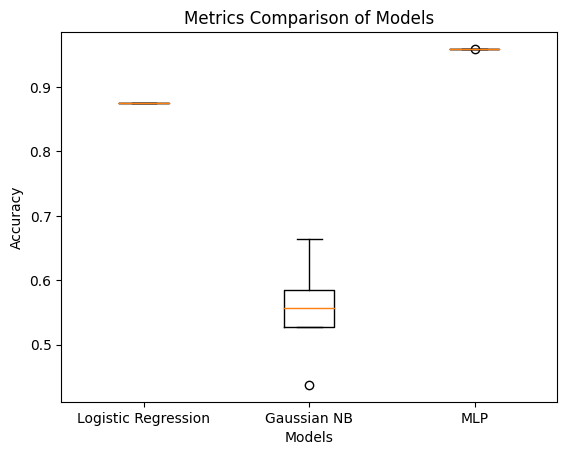

In [10]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature contribution in the model

In [11]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = X_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = X_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: 0
Means:
src_bytes                      11021.747100
dst_bytes                       4062.991926
dst_host_srv_count               188.859304
duration                         186.566311
dst_host_count                   149.102552
srv_count                         27.456984
count                             22.547193
same_srv_rate                      0.967507
dst_host_same_srv_rate             0.806603
logged_in                          0.705151
num_root                           0.544316
num_compromised                    0.477958
hot                                0.214385
srv_diff_host_rate                 0.125808
dst_host_same_src_port_rate        0.120201
dst_host_rerror_rate               0.045097
srv_rerror_rate                    0.044063
dst_host_srv_rerror_rate           0.043348
rerror_rate                        0.043111
dst_host_diff_srv_rate             0.041213
diff_srv_rate                      0.030901
num_file_creations     

### Ablation Analysis

In [12]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in features.columns:
    # Remove the current feature
    reduced_features = features.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(reduced_features, target, test_size=0.2, random_state=42)

    # Train a new model without the feature
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

Ablation Analysis Results:
                Feature Removed  Accuracy Score
0                      duration        0.600913
1                     src_bytes        0.830125
2                     dst_bytes        0.561619
3                          land        0.557253
4                wrong_fragment        0.557253
5                        urgent        0.557253
6                           hot        0.557253
7             num_failed_logins        0.557253
8                     logged_in        0.557253
9               num_compromised        0.557253
10                   root_shell        0.557253
11                 su_attempted        0.557253
12                     num_root        0.557253
13           num_file_creations        0.557253
14                   num_shells        0.557253
15             num_access_files        0.557253
16            num_outbound_cmds        0.557253
17                is_host_login        0.557253
18               is_guest_login        0.557253
19           

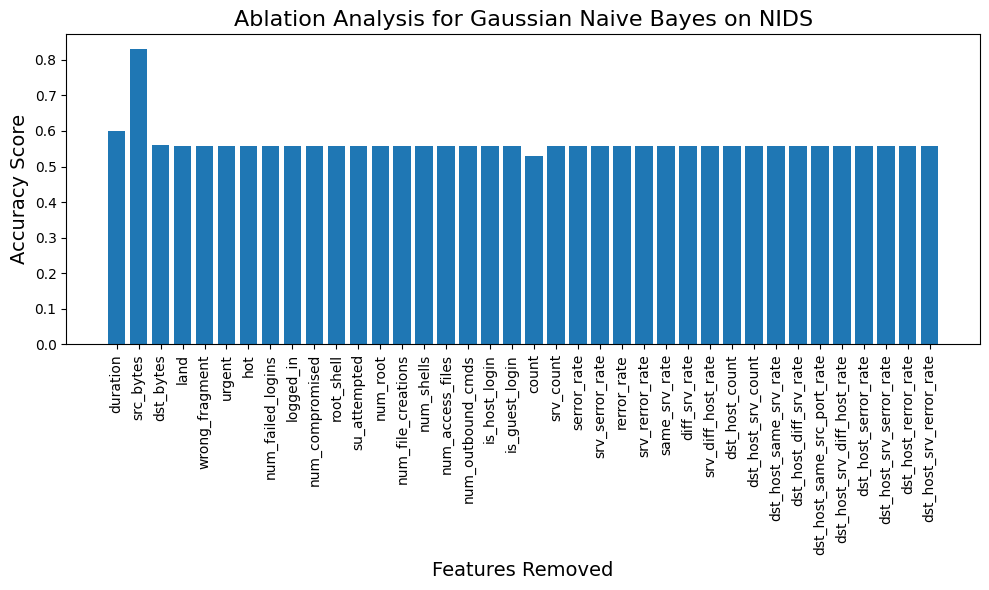

In [13]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Gaussian Naive Bayes on NIDS", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

## With Preprocessing

### Model Creation

In [14]:
# Load data
data = pd.read_csv('NIDs.csv')

data.drop("protocol_type", axis=1, inplace=True)
data.drop("service", axis=1, inplace=True)
data.drop("flag", axis=1, inplace=True)

# Define a dictionary mapping string labels to integers
class_mapping = {'normal':0,'anomaly':1}
# Convert the target column to integer type
data["class"] = data["class"].map(class_mapping).astype(int)

# Separate features and target
features = data.drop('class', axis=1)
target = data['class']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

### Different Model with Evalaution Metrics and Visualization

In [28]:
# Extensive preprocessing:
# - Drop columns with missing values
# - Encode categorical features
# - Scale numerical features

features_extensive = features.dropna(axis=0)
categorical_features = features_extensive.select_dtypes(include=["object"]).columns
numerical_features = features_extensive.select_dtypes(include=["int64", "float64"]).columns

encoder = LabelEncoder()
scaler = StandardScaler()

for col in categorical_features:
    features_extensive[col] = encoder.fit_transform(features_extensive[col])

features_extensive[numerical_features] = scaler.fit_transform(features_extensive[numerical_features])

sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

In [29]:
model=LogisticRegression(random_state=0)
model.fit(X_train_sc, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [30]:
# Calculate accuracy and confusion matrix
conf_matrix = confusion_matrix(model.predict(X_train_sc), y_train)
accuracy = accuracy_score(model.predict(X_train_sc), y_train)
precision = precision_score(model.predict(X_train_sc), y_train, average='weighted')
recall = recall_score(model.predict(X_train_sc), y_train, average='weighted')
f1 = f1_score(model.predict(X_train_sc), y_train,average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[11611   682]
 [  483  9896]]

Accuracy: 0.9486150317572336
Precision: 0.9488303951581484
Recall: 0.9486150317572336
F1 Score: 0.9486493453190933


In [31]:
# Train the model
model1 = GaussianNB().fit(X_train_sc, y_train)
# Make predictions
y_pred = model1.predict(X_test_sc)

In [32]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred, average='weighted')
recall1 = recall_score(y_test, y_pred, average='weighted')
f11 = f1_score(y_test, y_pred, average='weighted')
# Print results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Confusion Matrix:
[[1248  107]
 [ 132 1033]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1355
           1       0.91      0.89      0.90      1165

    accuracy                           0.91      2520
   macro avg       0.91      0.90      0.90      2520
weighted avg       0.91      0.91      0.91      2520


Accuracy: 0.9051587301587302
Precision: 0.9051765131427603
Recall: 0.9051587301587302
F1 Score: 0.905077867583469


In [33]:
# Initialize the classifier with random_state=0
mlp1 = MLPClassifier(random_state=0)
# Fit the classifier to the training data
mlp1.fit(X_train_sc, y_train)

MLPClassifier(random_state=0)

In [34]:
accuracy2 = accuracy_score(mlp1.predict(X_train_sc), y_train)
print("Accuracy:",accuracy2)
y_pred = mlp1.predict(X_test_sc)
precision2 = precision_score(y_test, y_pred, average='weighted')
recall2 = recall_score(y_test, y_pred, average='weighted')
f12 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision2)
print("Recall:", recall2)
print("F1-score:", f12)

Accuracy: 0.9934280169371913
Precision: 0.9924724381267829
Recall: 0.9924603174603175
F1-score: 0.9924586701383947


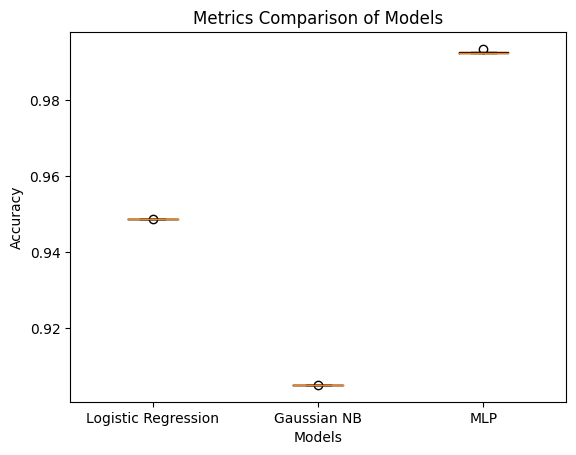

In [35]:
# Visualize accuracy scores
models = ['Logistic Regression', 'Gaussian NB', 'MLP']
accuracies = [
    [accuracy, precision, recall, f1],  # Logistic Regression accuracies
    [accuracy1, precision1, recall1, f11],  # Gaussian NB accuracies
    [accuracy2, precision2, recall2, f12]   # MLP accuracies
]
import matplotlib.pyplot as plt
plt.boxplot(accuracies, labels=models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Metrics Comparison of Models')
# Display the plot
plt.show()

### Feature contribution in the model

In [36]:
print("Features contributing to the model:")
for i, class_label in enumerate(model.classes_):
    print(f"\nClass: {class_label}")
    print("Means:")
    class_means = X_train[y_train == class_label].mean().sort_values(ascending=False)
    print(class_means)  # Mean for each feature in this class
    print("Variances:")
    class_variances = X_train[y_train == class_label].var().sort_values(ascending=False)
    print(class_variances)  # Variance for each feature in this class

Features contributing to the model:

Class: 0
Means:
src_bytes                      11021.747100
dst_bytes                       4062.991926
dst_host_srv_count               188.859304
duration                         186.566311
dst_host_count                   149.102552
srv_count                         27.456984
count                             22.547193
same_srv_rate                      0.967507
dst_host_same_srv_rate             0.806603
logged_in                          0.705151
num_root                           0.544316
num_compromised                    0.477958
hot                                0.214385
srv_diff_host_rate                 0.125808
dst_host_same_src_port_rate        0.120201
dst_host_rerror_rate               0.045097
srv_rerror_rate                    0.044063
rerror_rate                        0.043111
dst_host_diff_srv_rate             0.041213
diff_srv_rate                      0.030901
num_file_creations                 0.026636
dst_host_srv_diff_host_

<ipython-input-36-a3ba62de47eb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_means = X_train[y_train == class_label].mean().sort_values(ascending=False)
<ipython-input-36-a3ba62de47eb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_variances = X_train[y_train == class_label].var().sort_values(ascending=False)
<ipython-input-36-a3ba62de47eb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_means = X_train[y_train == class_label].mean().sort_values(ascending=False)
<ipython-input-36-a3ba62de47eb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  class_variances = X_train[y_train == class_label].var().sort_values(ascending=False)


### Ablation Analysis

In [37]:
# Perform ablation analysis
removed_features = []
scores = []

for feature in features_extensive.columns:
    # Remove the current feature
    reduced_features = features_extensive.drop(feature, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(reduced_features, target, test_size=0.2, random_state=42)

    # Train a new model without the feature
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Evaluate the model without the feature
    score = accuracy_score(y_test, model.predict(X_test))
    scores.append(score)

    # Store the removed feature
    removed_features.append(feature)

# Create a dataframe with results
results_df = pd.DataFrame({"Feature Removed": removed_features, "Accuracy Score": scores})

# Print the results
print("Ablation Analysis Results:")
print(results_df.to_string())

# Compare the original and reduced model performance
print("Reduced Model Accuracy Range:", min(scores), "-", max(scores))

Ablation Analysis Results:
                Feature Removed  Accuracy Score
0                      duration        0.905140
1                     src_bytes        0.904148
2                     dst_bytes        0.902163
3                          land        0.902560
4                wrong_fragment        0.898988
5                        urgent        0.904743
6                           hot        0.902362
7             num_failed_logins        0.902758
8                     logged_in        0.901766
9               num_compromised        0.907521
10                   root_shell        0.902758
11                 su_attempted        0.917047
12                     num_root        0.907323
13           num_file_creations        0.902957
14                   num_shells        0.902957
15             num_access_files        0.904346
16            num_outbound_cmds        0.902758
17                is_host_login        0.902758
18               is_guest_login        0.902560
19           

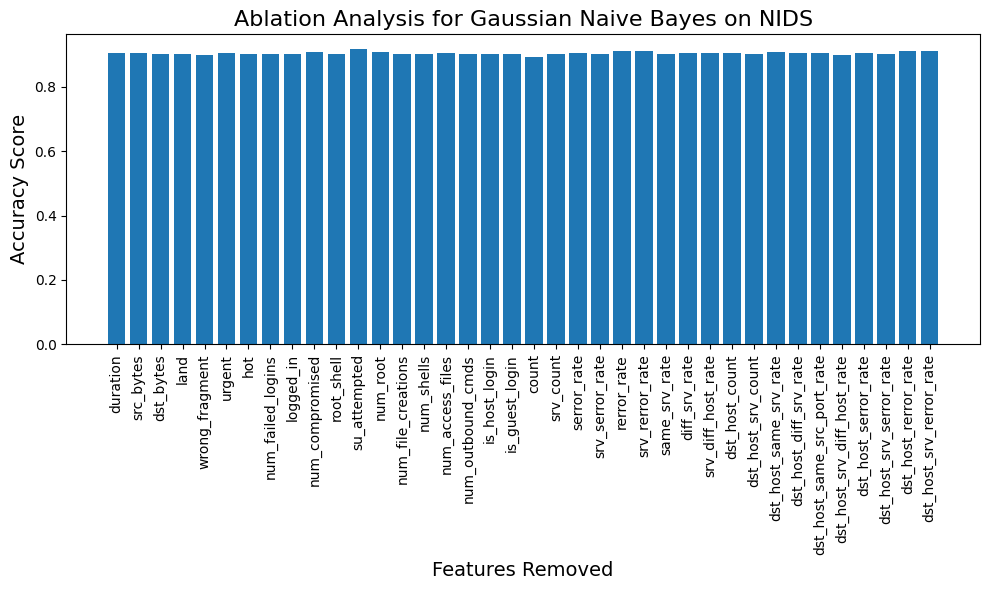

In [38]:
# Prepare data
features = results_df["Feature Removed"]
scores = results_df["Accuracy Score"]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(features, scores)

# Add labels and title
plt.xlabel("Features Removed", fontsize=14)
plt.ylabel("Accuracy Score", fontsize=14)
plt.title("Ablation Analysis for Gaussian Naive Bayes on NIDS", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()